In [171]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
from pathlib import Path
from copy import deepcopy
from mmcv.runner.checkpoint import save_checkpoint
from collections import OrderedDict
from tqdm import tqdm
import copy
import glob
import os

In [162]:
path = Path('../data/scratch')
test = json.load(open(path/'annotations'/'test.json'))


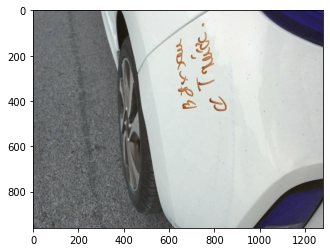

In [12]:
img = cv2.imread(str(path/'images'/data['images'][3]['file_name']))
plt.imshow(img)

In [241]:
#scratch pseudo
config_file1 = '../checkpoints/scratch-cp-exp5-HSV-LSJ-SWA/swa-scratch-copy-paste-HSV-LSJ.py'
checkpoint_file1 = 'best_scratch_ensemble.pth'

#scratch pseudo brightness
config_file2 = '../checkpoints/scratch_phase_2/scratch_pseudo.py'
checkpoint_file2 = '../checkpoints/scratch_phase_2/epoch_29.pth'

In [242]:
model1 = init_detector(config_file1, checkpoint_file1, device='cuda:2')
# model2 = init_detector(config_file2, checkpoint_file2, device='cuda:2')

Use load_from_local loader


In [45]:
new_model = deepcopy(model1)
for p,p1,p2 in zip(new_model.parameters(),model1.parameters(),model2.parameters()):
    p.detach().copy_(p1.detach()*0.5+p2.detach()*0.5)
    print('debug : ',p.detach())

debug :  tensor([[[[ 0.0242,  0.0361, -0.0084, -0.0192],
          [ 0.0409,  0.0449,  0.0151,  0.0066],
          [ 0.0095,  0.0161, -0.0013, -0.0166],
          [-0.0579, -0.0354, -0.0359, -0.0362]],

         [[-0.0064,  0.0137, -0.0212, -0.0372],
          [ 0.0267,  0.0512,  0.0265,  0.0214],
          [-0.0090,  0.0205,  0.0221,  0.0033],
          [-0.0511, -0.0093,  0.0026,  0.0022]],

         [[-0.0468, -0.0154, -0.0390, -0.0380],
          [-0.0097,  0.0199,  0.0056,  0.0191],
          [-0.0146,  0.0006,  0.0038,  0.0283],
          [-0.0244, -0.0007,  0.0130,  0.0599]]],


        [[[ 0.0015,  0.0040,  0.0038, -0.0016],
          [ 0.0063,  0.0070,  0.0068,  0.0030],
          [ 0.0071,  0.0070,  0.0054,  0.0022],
          [ 0.0050,  0.0040,  0.0041, -0.0002]],

         [[ 0.0068,  0.0110,  0.0110,  0.0043],
          [ 0.0097,  0.0106,  0.0112,  0.0071],
          [ 0.0103,  0.0116,  0.0104,  0.0060],
          [ 0.0065,  0.0099,  0.0093,  0.0020]],

         [[ 0.0039,

debug :  tensor([1.7966, 1.7589, 1.5661, 1.9204, 1.7697, 1.3194, 1.7657, 1.7144, 1.6351,
        1.5144, 1.7926, 1.6308, 1.7515, 1.6045, 1.7355, 1.6781, 1.7881, 1.8461,
        1.8219, 1.0733, 1.6172, 1.6596, 1.7739, 1.3005, 1.6038, 1.8595, 1.7343,
        1.6159, 1.6970, 1.5354, 1.6457, 1.4711, 1.6959, 1.8269, 1.6922, 1.6134,
        1.8211, 1.7155, 1.6996, 1.7148, 1.4764, 1.6631, 1.1921, 1.7321, 1.6673,
        1.7879, 1.6921, 1.7141, 1.6848, 1.6560, 1.7142, 1.6495, 1.5220, 1.7903,
        1.4603, 1.6428, 1.6923, 1.6255, 1.7499, 1.7681, 1.7052, 1.7814, 1.7063,
        1.4269, 1.6441, 1.8090, 1.3502, 1.7188, 1.5935, 1.7077, 1.6122, 1.7836,
        1.7077, 1.5842, 1.7326, 1.7377, 1.6336, 1.5925, 1.7298, 1.6206, 1.5665,
        1.7113, 1.8202, 1.5822, 1.7049, 1.5317, 1.6905, 1.6871, 1.6538, 1.5680,
        1.6761, 1.7091, 1.6455, 1.6902, 1.6167, 1.9166, 1.6746, 0.9837, 1.6424,
        1.6864, 1.5716, 1.6783, 1.6626, 1.7278, 1.9480, 1.7712, 1.7533, 1.5095,
        1.6567, 1.3948, 1.5896,

debug :  tensor([0.9990, 0.7738, 1.1138, 0.9791, 0.8112, 0.9495, 0.7935, 0.8303, 0.7935,
        0.8196, 0.6653, 0.8748, 0.7422, 0.9327, 0.7106, 0.6314, 0.8713, 1.1478,
        0.9657, 0.8712, 0.9005, 0.8713, 0.7152, 0.7113, 1.1001, 0.5283, 0.6840,
        0.7988, 0.8670, 0.7744, 0.9044, 0.7355, 0.8841, 0.7954, 0.8772, 0.7253,
        0.7734, 0.8505, 1.0960, 0.9400, 0.8294, 0.9176, 0.9264, 0.8413, 0.8030,
        0.8470, 0.4950, 0.8429, 0.7713, 0.7174, 0.8427, 0.9007, 0.8621, 0.6833,
        0.8197, 1.0634, 0.8969, 0.8270, 0.7465, 0.7405, 0.8012, 1.0204, 0.7326,
        0.8786, 0.7043, 0.6114, 0.9407, 0.8724, 1.1140, 0.6953, 0.8043, 0.7555,
        0.9121, 0.7761, 0.6783, 0.7976, 0.8001, 0.9249, 0.7424, 1.0066, 1.0356,
        0.9044, 0.7588, 0.9250, 0.8445, 0.9167, 0.8554, 0.7651, 0.8876, 0.8916,
        0.9771, 0.8269, 0.7927, 0.9670, 0.5187, 1.0118, 0.8380, 0.9711, 0.6658,
        0.9424, 0.6802, 0.7824, 0.9669, 1.0673, 0.9149, 0.7488, 0.8398, 0.8110,
        0.9464, 0.9205, 0.9535,

debug :  tensor([ 1.6053e-02, -1.3520e-02, -3.0115e-02, -1.5592e-01,  1.3415e-02,
        -7.1332e-02, -5.3949e-03, -2.4317e-02, -5.9361e-04, -6.8972e-02,
         3.5883e-02, -1.7335e-02, -9.6065e-02,  3.6544e-02, -1.0499e-02,
        -5.1618e-02,  1.1388e-02, -4.3773e-02,  5.7369e-02,  5.2385e-02,
        -8.4005e-02, -4.8156e-02, -8.1002e-02, -8.3375e-04,  5.2413e-02,
        -5.9026e-02,  1.1964e-01, -1.1561e-01,  2.9240e-02, -6.3898e-02,
         3.3106e-02, -2.3003e-02,  1.2765e-03,  4.7790e-02, -1.6013e-01,
         3.5483e-02, -2.0245e+00, -3.0800e-02,  1.0122e-02,  2.1693e-02,
         1.7517e-02, -7.1253e-02,  5.0026e-02,  3.4143e-02,  1.7969e-02,
        -1.3441e-01,  7.9913e-03,  4.4575e-02, -4.8655e-02,  3.4041e-02,
         2.4225e-02, -4.7278e-02, -7.6659e-02,  1.0136e-01, -3.4408e-01,
        -1.9449e-01, -1.8390e-01, -8.8579e-02, -2.4872e-02, -1.2036e-01,
        -3.5727e-03,  1.1948e-01, -8.0851e-02, -1.6111e-02, -1.6237e-02,
        -2.0011e-02,  2.9986e-02,  9.9594e

debug :  tensor([[-8.7621e-02, -3.6412e-01, -1.4960e+00],
        [-5.0405e-01, -6.8108e-01, -2.4896e+00],
        [-5.4662e-01, -4.7367e-01, -2.6866e+00],
        [-5.6422e-01, -6.6386e-01, -2.7205e+00],
        [-4.3002e-01, -4.3271e-01, -2.4248e+00],
        [-4.1365e-01, -3.9581e-01, -2.4651e+00],
        [ 1.9598e-01, -2.9938e-01, -9.5296e-01],
        [-3.4445e-01, -4.0796e-01, -2.3682e+00],
        [-4.2405e-01, -4.4879e-01, -2.6688e+00],
        [-3.1395e-01, -4.6695e-01, -2.2765e+00],
        [-4.4677e-01, -5.5570e-01, -3.4967e+00],
        [-3.2830e-01, -4.7820e-01, -2.5447e+00],
        [ 3.4794e-03, -4.4590e-02, -2.3668e+00],
        [-4.4846e-01, -5.8967e-01, -2.1980e+00],
        [-8.6259e-01, -9.8472e-01, -3.8885e+00],
        [-9.4432e-01, -7.8099e-01, -4.3579e+00],
        [-9.4428e-01, -9.1637e-01, -4.6799e+00],
        [-7.6118e-01, -6.5256e-01, -4.7180e+00],
        [-5.4319e-01, -4.9916e-01, -5.0745e+00],
        [ 2.4700e-01, -4.2671e-01, -2.0740e+00],
        [-6

debug :  tensor([ 2.8627e-01, -4.3136e-01, -5.7415e-03, -3.3329e-02,  7.0085e-03,
         3.4232e-02, -1.2031e-01,  8.0675e-02, -1.8845e-01,  7.0219e-03,
         2.9622e-02, -1.7582e-02,  2.7341e-02, -2.5109e-02,  1.6599e-01,
        -1.2603e-01,  1.1311e-01, -9.2688e-02, -3.2416e-02, -3.7136e-02,
         1.1390e-01,  8.1919e-02, -1.4572e-02,  8.3906e-02,  2.5068e-02,
         1.2703e-01, -1.9491e-01, -1.6185e-01, -2.4294e-01,  4.9916e-03,
         1.0021e-01, -1.2258e-01, -9.2441e-03,  2.2457e-03, -1.1313e-01,
        -7.0637e-02, -1.3018e-01,  5.8377e-01, -9.7233e-03, -4.4029e-02,
        -3.2777e-04, -7.6263e-02, -1.1026e-01, -2.9780e-02, -6.2402e-02,
        -4.2947e-01, -5.4338e-01,  6.9779e-02,  3.8914e-02, -5.5718e-02,
         1.4363e-01, -1.7855e-02, -7.1618e-03, -2.2994e-02, -5.2483e-02,
        -3.0051e-02, -4.6283e-01, -3.6009e-03,  9.8717e-02, -3.2885e-02,
         9.4511e-02, -1.5425e-01,  7.4645e-02, -3.7429e-02, -4.2248e-01,
         2.2079e-01, -1.0942e-01, -2.9921e

debug :  tensor([0.9629, 0.9056, 1.1122, 1.0866, 0.8520, 0.9196, 0.8134, 0.8134, 0.7445,
        0.8489, 0.6433, 0.9315, 0.8378, 0.8011, 0.9066, 0.6969, 0.9914, 0.9216,
        0.8707, 0.8968, 0.8061, 0.8571, 0.8528, 0.7884, 1.0027, 0.5610, 0.6574,
        0.8818, 0.8758, 0.7967, 0.9958, 0.6989, 0.9187, 0.7790, 0.8078, 0.8616,
        0.9122, 0.8372, 1.0990, 0.8131, 0.8674, 0.8561, 0.8191, 0.9495, 0.8055,
        0.9896, 0.6266, 0.7696, 0.6999, 0.8194, 0.8733, 0.9279, 0.9248, 0.7298,
        0.9216, 1.1889, 0.8292, 0.8824, 0.7250, 0.6864, 0.7913, 0.7497, 0.8427,
        0.8474, 0.7444, 0.6666, 0.8942, 0.9432, 0.9245, 0.7711, 0.7849, 0.7535,
        0.8554, 0.8192, 0.5758, 0.7784, 0.8701, 0.9632, 0.8635, 1.0328, 1.1482,
        0.8158, 0.9721, 1.0782, 0.8242, 1.0978, 0.8094, 0.9417, 0.8971, 0.7215,
        0.8132, 0.8612, 0.8413, 0.9679, 0.5260, 0.8552, 0.7963, 1.0328, 0.7260,
        0.9926, 0.6738, 0.8875, 0.9271, 0.9835, 0.8520, 0.9398, 0.8129, 0.8465,
        0.7829, 0.9248, 1.0583,

debug :  tensor([-5.9374e-02,  9.6045e-02, -1.5162e-01, -6.0096e-02, -2.9802e-02,
         1.7100e-02, -3.1258e-02, -1.8855e-02, -3.1710e-02, -7.4927e-02,
         1.1236e-01,  7.3364e-02, -1.0094e-01, -2.7706e-02,  4.8310e-02,
        -1.0682e-01, -1.7865e-02, -4.8628e-02, -1.0246e-01,  5.2815e-02,
         3.7871e-02,  1.3496e-01, -1.1622e-01,  1.2190e-01, -8.3187e-02,
         5.4713e-02,  4.8217e-02, -3.6406e-02, -1.8462e-02, -1.1420e-01,
         6.6405e-02, -8.2669e-02,  9.3660e-03,  3.7056e-02, -2.0089e-02,
         8.5019e-03,  2.8626e-02,  3.6224e-02,  5.8197e-02,  6.6253e-03,
        -2.1786e-03,  4.9622e-02, -2.2482e-02,  5.3225e-02, -4.0799e-02,
         9.3107e-02, -1.0225e-01,  6.0825e-02,  2.9264e-02,  6.5078e-02,
        -1.6063e-01, -6.2940e-02,  5.5170e-02,  2.6232e-02, -4.3126e-02,
         6.6526e-03, -7.8388e-04,  2.3554e-02,  1.3834e-01, -6.3250e-02,
         1.0135e-02, -3.4378e-02, -5.5197e-02, -1.4358e-02,  4.5036e-02,
         5.8778e-03,  1.9072e-02, -8.5205e

debug :  tensor([0.5305, 0.5617, 0.5269, 0.6144, 0.6280, 0.5675, 0.5216, 0.5884, 0.5333,
        0.5756, 0.5805, 0.5584, 0.5860, 0.6813, 0.5220, 0.5009, 0.5373, 0.5844,
        0.4942, 0.5672, 0.5544, 0.5508, 0.5323, 0.6111, 0.7671, 0.5586, 0.6394,
        0.5511, 0.5339, 0.4824, 0.6002, 0.5107, 0.6039, 0.6334, 0.6355, 0.5349,
        0.4057, 0.5844, 0.5139, 0.5615, 0.5581, 0.5639, 0.6048, 0.6367, 0.5679,
        0.6970, 0.5745, 0.5343, 0.5737, 0.5433, 0.5628, 0.6309, 0.5488, 0.5641,
        0.5485, 0.5623, 0.5578, 0.5910, 0.5309, 0.5583, 0.5089, 0.5568, 0.9479,
        0.5387, 0.6406, 0.5897, 0.6026, 0.8123, 0.6726, 0.5661, 0.5049, 0.5789,
        0.5913, 0.5385, 0.5310, 0.6278, 0.5707, 0.5019, 0.5760, 0.5817, 0.5470,
        0.6202, 0.8420, 0.5632, 0.5408, 0.5435, 0.5513, 0.5305, 0.6022, 0.5756,
        0.4891, 0.6158, 0.5398, 0.5957, 0.6681, 0.5211, 0.5016, 0.5450, 0.6204,
        0.5867, 0.6006, 0.6132, 0.6398, 0.4960, 0.5654, 0.6315, 0.4178, 0.5536,
        0.5339, 0.5832, 0.5762,

debug :  tensor([[[[-1.3556e-02, -1.5211e-02, -2.5165e-02],
          [ 5.7313e-02,  3.7288e-02,  3.9016e-04],
          [ 1.6614e-02,  1.4731e-02, -2.3851e-02]],

         [[-3.1382e-02, -6.7621e-02, -4.2049e-02],
          [-1.7438e-02, -1.0208e-02,  5.5691e-03],
          [ 9.2877e-03,  7.5957e-03,  1.1068e-02]],

         [[ 1.8281e-02, -4.0084e-03, -1.3502e-02],
          [-8.0375e-03, -1.1459e-02, -2.4595e-02],
          [ 1.8446e-02, -3.9712e-03,  6.6966e-03]],

         ...,

         [[-2.3006e-03, -6.0302e-03, -3.8105e-03],
          [ 5.1741e-02, -1.1318e-02, -5.1425e-03],
          [ 4.1044e-02,  2.9975e-03, -2.4511e-02]],

         [[-3.2088e-02, -9.8004e-03, -2.7778e-02],
          [-2.2390e-02,  1.2177e-02,  2.2983e-02],
          [-3.2520e-02, -3.7180e-02, -2.0414e-02]],

         [[-5.8043e-02, -1.2359e-02, -2.7656e-02],
          [-3.4114e-02, -2.0059e-02, -2.3833e-02],
          [-5.9401e-02, -2.3214e-02, -3.6281e-02]]],


        [[[ 4.3280e-02,  3.6184e-02, -3.2642

[[(594, 910), (649, 960)], [(800, 635), (839, 683)], [(796, 215), (905, 939)]] [0.8295767  0.8181736  0.76746714]


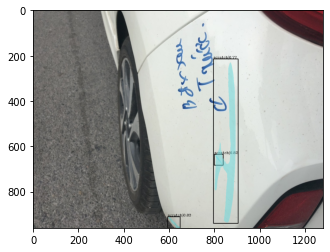

In [48]:
result = inference_detector(model1,img)
img_,pred_boxes,pred_segms,pred_labels,scores = show_result_pyplot(model1, img.copy(), result,score_thr=0.4)
print(pred_boxes,scores)
plt.imshow(img_)

[[(798, 635), (839, 683)], [(788, 244), (908, 960)], [(856, 224), (886, 362)], [(864, 394), (890, 418)]] [0.76485324 0.53316253 0.47682077 0.42045712]


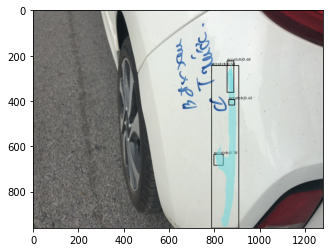

In [49]:
result = inference_detector(model2,img)
img_,pred_boxes,pred_segms,pred_labels,scores = show_result_pyplot(model2, img.copy(), result,score_thr=0.4)
print(pred_boxes,scores)
plt.imshow(img_)

[[(789, 263), (909, 942)], [(796, 621), (840, 688)], [(590, 904), (653, 959)], [(856, 230), (889, 366)], [(864, 393), (891, 418)], [(1091, 699), (1164, 754)], [(833, 941), (858, 960)], [(863, 377), (897, 663)], [(840, 233), (903, 791)], [(799, 631), (882, 709)], [(687, 150), (904, 940)]] [0.638107   0.59350604 0.58430123 0.48676267 0.47934362 0.4726495
 0.4705633  0.43963823 0.4189191  0.40660852 0.4001287 ]


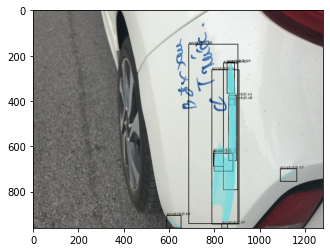

In [50]:
result = inference_detector(new_model,img)
img_,pred_boxes,pred_segms,pred_labels,scores = show_result_pyplot(new_model, img.copy(), result,score_thr=0.4)
print(pred_boxes,scores)
plt.imshow(img_)

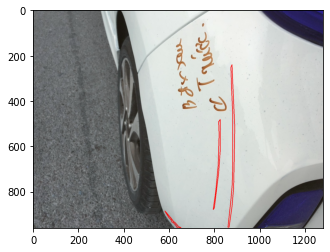

In [52]:
idx = data['images'][3]['id']
annos = [np.array(a['segmentation']).reshape(-1,2).astype(np.int32) for a in data['annotations'] if a['image_id']==idx]
draw = cv2.drawContours(img.copy(),annos,-1,(255,0,0),2)
plt.imshow(draw)

In [76]:
avg_model = AverageModel()
avg_model.update(model1)

[[(594, 910), (649, 960)], [(800, 635), (839, 683)], [(796, 215), (905, 939)]] [0.829589  0.8182115 0.7677949]


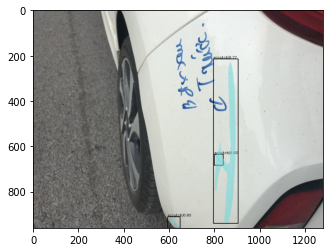

In [77]:
result = inference_detector(avg_model.get_model(),img)
img_,pred_boxes,pred_segms,pred_labels,scores = show_result_pyplot(avg_model.get_model(), img.copy(), result,score_thr=0.4)
print(pred_boxes,scores)
plt.imshow(img_)

In [78]:
avg_model.update(model2)

[[(789, 263), (909, 942)], [(796, 621), (840, 688)], [(590, 904), (653, 959)], [(856, 230), (889, 366)], [(864, 393), (891, 418)], [(1091, 699), (1164, 754)], [(833, 941), (858, 960)], [(863, 377), (897, 663)], [(840, 233), (903, 791)], [(799, 631), (882, 709)], [(687, 150), (904, 940)]] [0.6381028  0.593596   0.58430123 0.4867484  0.47934863 0.4726495
 0.47055757 0.43970773 0.4189383  0.40667042 0.40013573]


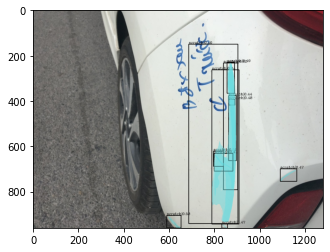

In [79]:
result = inference_detector(avg_model.get_model(),img)
img_,pred_boxes,pred_segms,pred_labels,scores = show_result_pyplot(avg_model.get_model(), img.copy(), result,score_thr=0.4)
print(pred_boxes,scores)
plt.imshow(img_)

In [80]:
avg_model.reverse_update(model2)

[[(594, 910), (649, 960)], [(800, 635), (839, 683)], [(796, 215), (905, 939)]] [0.82961655 0.8182441  0.76744145]


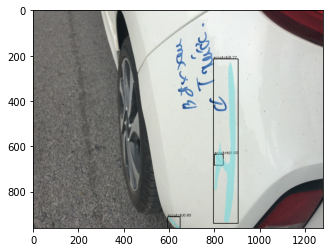

In [81]:
result = inference_detector(avg_model.get_model(),img)
img_,pred_boxes,pred_segms,pred_labels,scores = show_result_pyplot(avg_model.get_model(), img.copy(), result,score_thr=0.4)
print(pred_boxes,scores)
plt.imshow(img_)

In [85]:
save_checkpoint(avg_model.get_model(),'dmeo.pth')

In [86]:
#scratch pseudo
config_file_dm = '../checkpoints/scratch-cp-exp5-HSV-LSJ-SWA/swa-scratch-copy-paste-HSV-LSJ.py'
checkpoint_file_dm = 'dmeo.pth'
model_dm = init_detector(config_file_dm, checkpoint_file_dm, device='cuda:2')

/mmdetection/mmdet/core/anchor/builder.py:15: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  warnings.warn(


Use load_from_local loader


[[(594, 910), (649, 960)], [(800, 635), (839, 683)], [(796, 215), (905, 939)]] [0.82961655 0.8182441  0.76744145]


/mmdetection/mmdet/datasets/utils.py:64: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/mmdetection/mmdet/core/anchor/anchor_generator.py:359: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  warnings.warn(


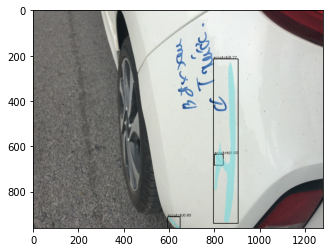

In [87]:
result = inference_detector(model_dm,img)
img_,pred_boxes,pred_segms,pred_labels,scores = show_result_pyplot(model_dm, img.copy(), result,score_thr=0.4)
print(pred_boxes,scores)
plt.imshow(img_)

In [88]:
def cal_score(model):
    return 0

def model_soup(model_list = [])
    best_score = 0
    soup = AverageModel()
    
    for idx,model in enumerate(model_list):
        soup.update(model)
        curr_score = cal_score(soup)
        
        if curr_score > best_score:
            best_score = curr_score
        else:
            soup.reverse_update(model)
    
    print('best score : ',best_score,' num average : ',soup.n_average)
    return soup

2

In [90]:
total_yolo_bboxes = json.load(open('yolo_test_deploy_scratch_1408_thres_025.json'))

In [235]:
def normolize_box(boxes,height,width):
    new_boxes = []
    #print(boxes)
    #boxes.pop()
    #boxes = [[boxes[0],boxes[1]],[boxes[2],boxes[3]]]
    for b in boxes:
        new_b = []
        #b = [[b[0],b[1]],[b[2],b[3]]]
        for p in b:
            new_b.extend(np.array(p)/(width,height))
        new_boxes.append(new_b)
    #print(new_boxes)
    return new_boxes

def get_data_box_ensemble(img,idx,name,boxes,segms,labels,scores):
    data_box = OrderedDict()
    data_box['image'] = name
    #print(boxes)
    i_boxes = total_yolo_bboxes[str(idx)]['boxes']
    yolo_boxes = copy.deepcopy(i_boxes)
    h,w = img.shape[:2]
    for j in range(len(yolo_boxes)):
        yolo_boxes[j][0] = int(yolo_boxes[j][0]*w)
        yolo_boxes[j][1] = int(yolo_boxes[j][1]*h)
        yolo_boxes[j][2] = int(yolo_boxes[j][2]*w)
        yolo_boxes[j][3] = int(yolo_boxes[j][3]*h)
        yolo_boxes[j] = [(yolo_boxes[j][0],yolo_boxes[j][1]),(yolo_boxes[j][2],yolo_boxes[j][3])] 
    #print(yolo_boxes)
    check_boxes = [0 for i in yolo_boxes]
    check_pred = [0 for i in boxes]
    out_boxes = []
    out_fp_boxes = []
    for i,b in enumerate(boxes):
        ious = [cal_iou(img,b,j) for j,check in zip(yolo_boxes,check_boxes) if check == 0]
        
        if len(ious) == 0:
            break
        max_id = np.argmax(ious)
        
        if ious[max_id] >= 0.25 : 
            out_boxes.append(b)
            check_boxes[max_id] = 1
            check_pred[i] = 1
        else:
            out_fp_boxes.append(b)
            check_pred[i] = -1
    #print('out:',out_boxes)
    data_box['boxes'] = normolize_box(out_boxes,*img.shape[:-1])
    
    segm_masks = []
    #print('check',segms.sum())
#     for i,segm in enumerate(segms) :
#         #if check_pred[i] == 0: # for fp only
#         if check_pred[i] != 1 : 
#             continue
#         segm = segm.astype(np.uint8)
#         contours, _ = cv2.findContours(segm, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#         contours = [c.tolist() for c in contours]
#         segm_masks.append(contours)
        
    data_box['segms'] = segm_masks
    data_box['labels'] = labels.tolist()
    #print('scores :',scores)
    #print('check :',check_pred)
    data_box['scores'] = [float(s) for s,c in zip(scores,check_pred) if c == 1]
    
    return data_box

def cal_iou(img,box1,box2):
    #input 
    # img : cv2 image
    # box1, box2 is [(x1,y1),(x2,y2)]
    # output : iou of box1 and box2
    
    mask1 = np.zeros_like(img[:,:,0])
    mask1[box1[0][1]:box1[1][1],box1[0][0]:box1[1][0]] = 1
    
    mask2 = np.zeros_like(img[:,:,0])
    mask2[box2[0][1]:box2[1][1],box2[0][0]:box2[1][0]] = 1
    
    intersect = np.logical_and(mask1,mask2)
    
    if intersect.sum() == 0:
        return 0
    
    return intersect.sum() / (mask1.sum()+mask2.sum()-intersect.sum())

def cal_iou_mask(img,contour1,contour2):
    #print(contour1)
    #print(contour2)
    #print(img.shape[:2])
    mask1 = np.zeros(img.shape[:2])
    mask2 = np.zeros(img.shape[:2])
    #print(mask1.shape,mask2.shape)
    
    mask1 = cv2.fillPoly(mask1,contour1,1)
    mask2 = cv2.fillPoly(mask2,[contour2],1)
    
    plt.imshow(np.hstack([mask1,mask2]))
    intersect = np.logical_and(mask1,mask2)
    
    if intersect.sum() == 0:
        return 0
    
    return intersect.sum() / (mask1.sum()+mask2.sum()-intersect.sum())
    #pass

def cal(img,pred_boxes,pred_labels,gt_boxes,gt_labels, name):
    tp = 0
    
    for i in range(len(pred_boxes)):
        i_gt_boxes = [m for (m,n) in zip(gt_boxes,gt_labels) if n == pred_labels[i]]
        for j in range(len(i_gt_boxes)):
            iou = cal_iou(img,pred_boxes[i],i_gt_boxes[j])
            if iou > 0.25 :
                tp += 1
                idx = gt_boxes.index(i_gt_boxes[j])
                #gt_labels[idx] = -1
                break
            
    fp = len(pred_boxes) - tp
    fn = len(gt_boxes) - tp
    
    return tp,fp,fn 

#global check_dense = 0
def cal_v2(img,pred_boxes,pred_labels,gt_boxes,gt_labels, name,check_dense):
    fp = 0
    tp = 0
    fp_boxes = []
    tp_check = [0 for i in pred_boxes]
    
    for i in range(len(pred_boxes)):
        ious = [cal_iou(img,pred_boxes[i],gt_boxes[j]) for j in range(len(gt_boxes))]
        
        if len(ious) == 0:
            return 0,0,0,fp_boxes
        
        idx = np.argmax(ious)

        if gt_labels[idx] == -1 :
            continue

        if ious[idx] >= 0.25:
            gt_labels[idx] = -1
            tp += 1
            tp_check[i] = 1
        else:
            fp += 1
            fp_boxes.append(pred_boxes[i])

    fn = len(gt_boxes) - tp
    
    if len(gt_boxes) >= 8 and tp/len(gt_boxes) > 1:
        check_dense += 1
        
        print('dense cases :',check_dense)
        fp = 0
    
    return tp,fp,fn, fp_boxes,check_dense, tp_check


def cal_score(model):
    data = OrderedDict()

    for i in tqdm(test['images'][500:1000]):
        image = cv2.imread(str(path/'images'/i['file_name']))
        result = inference_detector(model, image)
        img_,pred_boxes,pred_segms,pred_labels,pred_scores = show_result_pyplot(model, image.copy(), result,score_thr=0.3)
        data[i['id']] = get_data_box_ensemble(image,i['id'],i['file_name'],pred_boxes,pred_segms,pred_labels,pred_scores)
    #     data[i['id']] = get_data_box(image,i['file_name'],pred_boxes,pred_labels,pred_scores)
        #break
    with open('tmp.json', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)


    es = json.load(open('tmp.json')) 
    total_tp = 0
    total_fn = 0
    total_fp = 0
    #c = 0
    #for i in es.keys():
    #    c += len(es[i]['scores'])
    #print(c)
    fp_cases = OrderedDict()
    check_dense = 0
    count_gt = 0
    for i in tqdm(test['images'][500:1000]):
        image = cv2.imread(str(path/'images'/i['file_name']))
        h,w,_=image.shape
        gt_boxes = [a['bbox'] for a in test['annotations'] if a['image_id']==i['id']]
        count_gt += len(gt_boxes)
        gt_boxes = [[(int(b[0]),int(b[1])),(int(b[0])+int(b[2]),int(b[1])+int(b[3]))] for b in gt_boxes]
        #gt_segms = [np.array(a['segmentation']).reshape(-1,2).astype(np.int32) for a in test['annotations'] if a['image_id']==i['id']]    
        #gt_labels = [a['category_id'] for a in test['annotations'] if a['image_id']==i['id']]
        gt_labels = [0 for a in test['annotations'] if a['image_id']==i['id']]

        pred_boxes = copy.deepcopy(es[str(i['id'])]['boxes'])
        for j in range(len(pred_boxes)):
            pred_boxes[j][0] = int(pred_boxes[j][0]*w)
            pred_boxes[j][1] = int(pred_boxes[j][1]*h)
            pred_boxes[j][2] = int(pred_boxes[j][2]*w)
            pred_boxes[j][3] = int(pred_boxes[j][3]*h)

            pred_boxes[j] = [(pred_boxes[j][0],pred_boxes[j][1]),(pred_boxes[j][2],pred_boxes[j][3])]

        #pred_segms = copy.deepcopy(es[str(i['id'])]['segms'])
        #for idx,segm in enumerate(pred_segms):
        #    pred_segms[idx] = [np.array(s).astype(np.int32) for s in pred_segms[idx]]

        #print(i['id'])
        #print(es[str(i['id'])])
        pred_labels = es[str(i['id'])]['labels']
        pred_labels = [0 for l in pred_labels]

    #     print(i['id'],i['file_name'])
        old_check = check_dense
        tp,fp,fn, fp_boxes,check_dense, tp_check = cal_v2(image,pred_boxes,pred_labels,gt_boxes,gt_labels, i['file_name'],old_check)
        #tp,fp,fn, fp_boxes = cal_v2(image,pred_segms,pred_labels,gt_segms,gt_labels, i['file_name'])
        if check_dense - old_check == 1:
            dense_path = Path('dense_scratch')
            dense_path.mkdir(parents=True,exist_ok=True)
            idx = i['id']
            out,check = plot_fp_v2(idx,es[str(idx)]['boxes'])
            cv2.imwrite(str(dense_path/(str(idx)+'.jpg')),out)
        es[str(i['id'])]['tp_check'] = tp_check
        total_tp += tp
        total_fp += fp
        total_fn += fn

        if len(fp_boxes) > 0:
            fp_cases[i['file_name']] = fp_boxes
    
    pre = total_tp / (total_tp + total_fp)
    rec = total_tp / (total_tp + total_fn)
    return 2*pre*rec / (pre + rec)
    
# print(total_tp,total_fp,total_fn,check_dense,count_gt)

In [113]:
cal_score(model1)

  0%|                                                                                                                                                                             | 0/100 [00:00<?, ?it/s]/mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/mmdetection/mmdet/core/anchor/anchor_generator.py:359: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.53it/s]


0.5552631578947369

In [231]:
def avg_fn(averaged_model_parameter, model_parameter,num_averaged):
    return averaged_model_parameter + (model_parameter - averaged_model_parameter) / (num_averaged + 1)

def reverse_avg_fn(averaged_model_parameter,model_parameter,num_averaged):
    return (num_averaged*averaged_model_parameter - model_parameter)/(num_averaged-1)

class AverageModel():
    def __init__(self,n_average=0):
        self.n_average = n_average
        self.name_list = []
    
    def update(self,model):
        if self.n_average == 0:
            self.average_model = model['model']
            self.n_average += 1
            self.name_list.append(model['name'])
            
            return
        
        for ap,p in zip(self.average_model.parameters(),model['model'].parameters()):
            device = ap.device
            p = p.detach().to(device)
            ap.detach().copy_(avg_fn(ap.detach(),p,self.n_average))
        
        self.n_average += 1
        self.name_list.append(model['name'])
    
    def reverse_update(self,model):
        for ap,p in zip(self.average_model.parameters(),model['model'].parameters()):
            device = ap.device
            p = p.detach().to(device)
            ap.detach().copy_(reverse_avg_fn(ap.detach(),p,self.n_average))
        
        self.n_average -= 1
        self.name_list.remove(model['name'])
    
    def get_model(self):
        return self.average_model
    
    def check_sum(self):
        print('check sum : ',sum([p.detach().sum() for p in self.average_model.parameters()]))

In [232]:
def get_model(p):
    files = [str(f) for f in Path(p).iterdir() if f.is_file()]
    config_file = [f for f in files if '.py' in f][0]
    checkpoint_file = [f for f in files if '.pth' in f][0]
    
#     print(config_file,checkpoint_file)
    return {'name':os.path.basename(p),'model':init_detector(config_file, checkpoint_file, device='cuda:2')}


def ordered_model_list(model_list):
    score_list = [cal_score(model['model']) for model in model_list]
    ordered = np.argsort(-1*np.array(score_list))
    print('new order  : ',ordered)
    return np.array(model_list)[ordered].tolist() 

In [236]:
model_paths = glob.glob('../checkpoints/scratch*')
model_list = [get_model(p) for p in model_paths]

model_list = ordered_model_list(model_list)
# for mp in model_paths:
#     print(get_model(mp)['name'])

Use load_from_local loader
Use load_from_local loader
Use load_from_local loader
Use load_from_local loader
Use load_from_local loader
Use load_from_local loader
Use load_from_local loader
Use load_from_local loader


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:39<00:00,  5.04it/s]

new order  :  [0 5 7 4 6 3 1 2]


In [223]:
def model_soup(model_list=[]):
    best_score = 0
    ensemble = AverageModel()
    
    for model in model_list:
        ensemble.update(copy.deepcopy(model))
        curr_score = cal_score(ensemble.get_model())
        
        if curr_score > best_score : 
            best_score = curr_score
        else:
            ensemble.reverse_update(copy.deepcopy(model))
        
        print('best score : ',best_score)
        print('ensemble : ',ensemble.n_average,' name : ',ensemble.name_list)
        ensemble.check_sum()
    
    return ensemble.get_model()

In [224]:
best_model = model_soup(model_list)

  0%|                                                                                                                                                                              | 0/10 [00:00<?, ?it/s]

best score :  0.6461538461538462
ensemble :  1  name :  ['scratch-cp-exp4-HSV-LSJ']
check sum :  tensor(-12954.4541, device='cuda:2')


  0%|                                                                                                                                                                              | 0/10 [00:00<?, ?it/s]

best score :  0.6461538461538462
ensemble :  1  name :  ['scratch-cp-exp4-HSV-LSJ']
check sum :  tensor(-12954.4551, device='cuda:2')


  0%|                                                                                                                                                                              | 0/10 [00:00<?, ?it/s]

best score :  0.6461538461538462
ensemble :  1  name :  ['scratch-cp-exp4-HSV-LSJ']
check sum :  tensor(-12954.4541, device='cuda:2')


  0%|                                                                                                                                                                              | 0/10 [00:00<?, ?it/s]

best score :  0.6470588235294117
ensemble :  2  name :  ['scratch-cp-exp4-HSV-LSJ', 'scratch-LSJ-cp-HSV-fully-matching-filter']
check sum :  tensor(-11639.4004, device='cuda:2')


  0%|                                                                                                                                                                              | 0/10 [00:00<?, ?it/s]

best score :  0.6470588235294117
ensemble :  2  name :  ['scratch-cp-exp4-HSV-LSJ', 'scratch-LSJ-cp-HSV-fully-matching-filter']
check sum :  tensor(-11639.3994, device='cuda:2')


  0%|                                                                                                                                                                              | 0/10 [00:00<?, ?it/s]

best score :  0.6470588235294117
ensemble :  2  name :  ['scratch-cp-exp4-HSV-LSJ', 'scratch-LSJ-cp-HSV-fully-matching-filter']
check sum :  tensor(-11639.3975, device='cuda:2')


  0%|                                                                                                                                                                              | 0/10 [00:00<?, ?it/s]

best score :  0.6470588235294117
ensemble :  2  name :  ['scratch-cp-exp4-HSV-LSJ', 'scratch-LSJ-cp-HSV-fully-matching-filter']
check sum :  tensor(-11639.3984, device='cuda:2')


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.70it/s]


best score :  0.6470588235294117
ensemble :  2  name :  ['scratch-cp-exp4-HSV-LSJ', 'scratch-LSJ-cp-HSV-fully-matching-filter']
check sum :  tensor(-11639.3984, device='cuda:2')


In [237]:
print('check sum : ',sum([p.detach().sum() for p in best_model.parameters()]))

check sum :  tensor(-11639.3984, device='cuda:2')


In [238]:
save_checkpoint(best_model,'best_scratch_ensemble.pth')

In [216]:
img = cv2.imread(str(path/'images'/test['images'][4]['file_name']))

check sum :  tensor(-10324.3350, device='cuda:2')
[[(581, 792), (909, 895)], [(1057, 779), (1274, 812)], [(0, 787), (364, 849)], [(770, 0), (890, 72)], [(112, 1272), (206, 1307)], [(1320, 794), (1403, 837)], [(1047, 774), (1361, 827)], [(886, 1248), (974, 1273)], [(586, 843), (884, 898)]] [0.9428998  0.932753   0.86832625 0.8438243  0.83753926 0.6637271
 0.57365143 0.49496466 0.4672208 ]


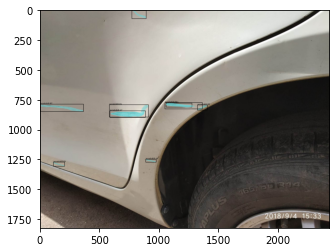

In [239]:
model1 = model_list[0]['model']
print('check sum : ',sum([p.detach().sum() for p in model1.parameters()]))
result = inference_detector(model1,img)
img_,pred_boxes,pred_segms,pred_labels,scores = show_result_pyplot(model1, img.copy(), result,score_thr=0.4)
print(pred_boxes,scores)
plt.imshow(img_)

check sum :  tensor(-11639.3984, device='cuda:2')
[[(562, 791), (900, 889)], [(1062, 778), (1274, 814)], [(6, 788), (367, 850)], [(770, 0), (890, 70)], [(112, 1273), (206, 1306)], [(1319, 794), (1402, 839)], [(1048, 774), (1392, 828)], [(567, 842), (888, 899)], [(3, 790), (282, 827)], [(881, 1248), (990, 1275)], [(2336, 430), (2378, 529)], [(1412, 642), (1527, 736)], [(1031, 869), (1139, 989)]] [0.9027274  0.845145   0.80342555 0.7075533  0.68243206 0.6479426
 0.5569118  0.49897632 0.47393942 0.45348322 0.44228792 0.43833694
 0.43705794]


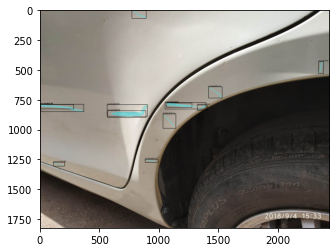

In [240]:
print('check sum : ',sum([p.detach().sum() for p in best_model.parameters()]))

result = inference_detector(best_model,img)
img_,pred_boxes,pred_segms,pred_labels,scores = show_result_pyplot(best_model, img.copy(), result,score_thr=0.4)
print(pred_boxes,scores)
plt.imshow(img_)

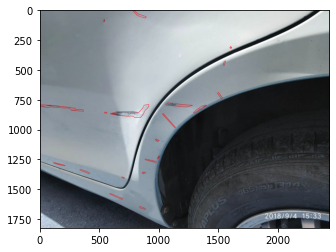

In [219]:
idx = test['images'][4]['id']
annos = [np.array(a['segmentation']).reshape(-1,2).astype(np.int32) for a in test['annotations'] if a['image_id']==idx]
draw = cv2.drawContours(img.copy(),annos,-1,(255,0,0),2)
plt.imshow(draw)

/mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/mmdetection/mmdet/core/anchor/anchor_generator.py:359: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  warnings.warn(


[[(596, 780), (909, 900)], [(4, 789), (341, 856)], [(1057, 774), (1271, 809)], [(1309, 793), (1401, 841)], [(113, 1269), (215, 1303)], [(774, 0), (885, 68)], [(1054, 778), (1309, 837)], [(875, 1243), (966, 1271)], [(10, 778), (904, 895)], [(589, 848), (837, 890)]] [0.8752914  0.77765507 0.7597314  0.68226016 0.67797565 0.6700119
 0.4937314  0.456459   0.44676316 0.41774774]


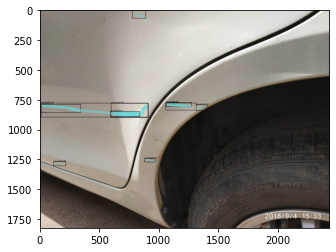

In [198]:
ensemble = AverageModel()
ensemble.update(model_list[0])
ensemble.update(model_list[-1])

demo_model = ensemble.get_model()

result = inference_detector(demo_model,img)
img_,pred_boxes,pred_segms,pred_labels,scores = show_result_pyplot(demo_model, img.copy(), result,score_thr=0.4)
print(pred_boxes,scores)
plt.imshow(img_)

In [ ]:
init()